In [56]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import gmaps
import gmaps.datasets
from config import gkey

In [2]:
#Create file path
file_path= os.path.join("..","Final Output Data","summary_data.csv")

In [23]:
#load final data into data-frame
summary_df=pd.read_csv(file_path)
summary_df=summary_df[summary_df["2018 Avg Score"]!=0]
summary_df.head()

,County,Municipality,Location,Property Count,Mean Property Tax,Median Property Tax,Mean Market Value,Median Market Value,Serious Crimes,Auto Theft,Larceny,Total,Population,Avg. Income,2018 Avg Score,2019 Avg Score,School Count
0,MONMOUTH,ABERDEEN TWP,"40.436522, -74.234672",6335,7995.348783,8250.990,3.327775e+05,3.434176e+05,119.4,65.3,789.0,973.7,2573.0,47906.0,51.849535,63.898890,2.0
1,ATLANTIC,ABSECON CITY,"39.471343, -74.447517",3278,5580.447108,5573.360,1.804123e+05,1.801832e+05,351.3,60.6,2132.9,2544.8,34958.0,51397.0,41.017145,39.107800,2.0
2,BERGEN,ALLENDALE BORO,"41.032669, -74.133826",2250,15198.085404,13502.915,6.939892e+05,6.165828e+05,116.6,58.3,378.8,553.7,6674.0,105387.0,97.409063,97.112427,3.0
5,WARREN,ALPHA BORO,"40.708224, -75.147074",804,5821.718843,5722.710,1.756172e+05,1.726306e+05,349.6,0.0,1311.1,1660.7,28925.0,44092.0,41.698536,47.710191,11.0
6,BERGEN,ALPINE BORO,"40.984877, -73.912695",659,21381.131017,17349.030,3.085097e+06,2.503303e+06,106.8,213.6,106.8,427.2,1649.0,128287.0,95.250735,95.697465,2.0


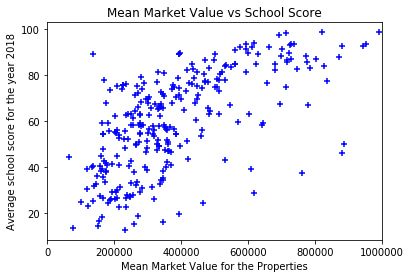

<Figure size 432x288 with 0 Axes>

In [47]:
#create a scatter plot- average school score for 2018 and mean market value of the properties
x=summary_df['Mean Market Value']
y =summary_df['2018 Avg Score']
plt.scatter(x, y, marker="+", color="blue")
plt.title("Mean Market Value vs School Score")
plt.xlabel("Mean Market Value for the Properties")
plt.ylabel("Average school score for the year 2018")
plt.xlim(0, 1000000)
plt.show()
plt.savefig("../Final Summary Data/MeanValue_AvgScore_Scatter.png")

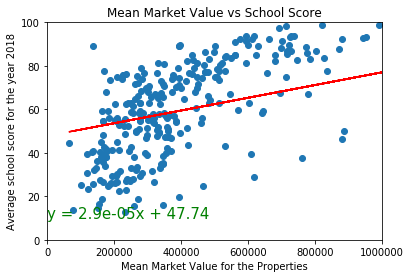

<Figure size 432x288 with 0 Axes>

In [48]:
#plotting the line of regression between the mean market value and the average score
x=summary_df['Mean Market Value']
y =summary_df['2018 Avg Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlim(0, 1000000)
plt.ylim(0,100)
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.title("Mean Market Value vs School Score")
plt.xlabel("Mean Market Value for the Properties")
plt.ylabel("Average school score for the year 2018")
plt.show()
plt.savefig("../Final Summary Data/MeanValue_AvgScore_Regress.png")


In [31]:
# compute the Pearson correlation coefficient between "Mean Market Value" and "Average Score"
property_value = summary_df.iloc[:,6]
score = summary_df.iloc[:,14]
correlation = st.pearsonr(property_value,score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.46


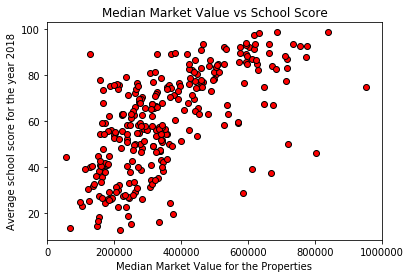

In [49]:
#create a scatter plot- average school score for 2018 and median market value of the properties
x=summary_df['Median Market Value']
y =summary_df['2018 Avg Score']
plt.scatter(x, y, marker="o", color="red", edgecolor="black")
plt.xlabel("Median Market Value for the Properties")
plt.ylabel("Average school score for the year 2018")
plt.xlim(0, 1000000)
plt.title("Median Market Value vs School Score")
plt.xlabel("Median Market Value for the Properties")
plt.ylabel("Average school score for the year 2018")
plt.savefig("../Final Summary Data/MedianValue_AvgScore_Scatter.png")
plt.show()

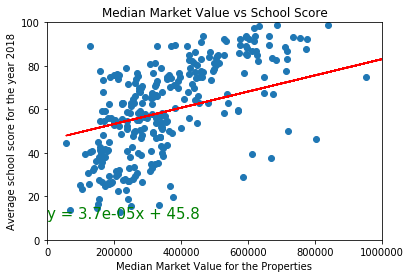

In [50]:
#plotting the line of regression between the median market value and the average score
x=summary_df['Median Market Value']
y =summary_df['2018 Avg Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlim(0, 1000000)
plt.ylim(0,100)
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.title("Median Market Value vs School Score")
plt.xlabel("Median Market Value for the Properties")
plt.ylabel("Average school score for the year 2018")
plt.savefig("../Final Summary Data/MedianValue_AvgScore_Regress.png")
plt.show()


In [51]:
# compute the Pearson correlation coefficient between "Median Market Value" and "Average Score"
property_value = summary_df.iloc[:,7]
score = summary_df.iloc[:,14]
correlation = st.pearsonr(property_value,score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.48


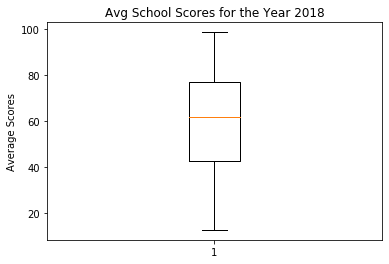

In [52]:
#Computing the quantiles
scores = summary_df['2018 Avg Score']
fig1, ax1 = plt.subplots()
ax1.set_title('Avg School Scores for the Year 2018')
ax1.set_ylabel('Average Scores')
ax1.boxplot(scores)
plt.savefig("../Final Summary Data/AvgScore_boxplot.png")
plt.show()

In [42]:
quartiles = scores.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of scores is: {lowerq}")
print(f"The upper quartile of scores is: {upperq}")
print(f"The interquartile range of scores is: {iqr}")
print(f"The median of scores is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of scores is: 42.7913925
The upper quartile of scores is: 77.10633227272727
The interquartile range of scores is: 34.31493977272727
The median of scores is: 61.87333857142857 
Values below -8.681017159090906 could be outliers.
Values above 128.57874193181817 could be outliers.
